In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # importing neccesary ,libraries

In [2]:
Train_Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv")

In [3]:
Train_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
Train_Data.shape # checking the shape

(8523, 12)

In [5]:
Train_Data.info() #checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
Train_Data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
Train_Data["Item_Fat_Content"]=Train_Data["Item_Fat_Content"].replace({'Low Fat':0,'low fat':1,'LF':2,'Regular':3,'reg':4})

In [8]:
Train_Data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [9]:
Train_Data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
Train_Data["Outlet_Size"]=Train_Data["Outlet_Size"].replace({'Small':0,'Medium':1,'High':2})

In [11]:
Train_Data["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [12]:
Train_Data["Outlet_Location_Type"]=Train_Data["Outlet_Location_Type"].replace({'Tier 1':0,'Tier 2':1,'Tier 3':2})

In [13]:
Train_Data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
Train_Data["Outlet_Type"]=Train_Data["Outlet_Type"].replace({'Supermarket Type1':0,'Supermarket Type2':1,'Supermarket Type3':2,'Grocery Store':3})

In [15]:
Train_Data.isnull().sum() #Checking the null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
Train_Data["Outlet_Size"].value_counts() #checking the total count of Outlet size

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [17]:
missing_outlet=np.where(Train_Data["Outlet_Size"].isnull()==True)
missing_outlet

(array([   3,    8,    9, ..., 8509, 8514, 8519], dtype=int64),)

In [18]:
Train_Data=Train_Data.drop(Train_Data.index[missing_outlet],axis=0)

In [19]:
Train_Data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1.0,0,0,3735.1380
1,DRC01,5.920,3,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,2,1,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1.0,0,0,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,2.0,2,0,994.7052
5,FDP36,10.395,3,0.000000,Baking Goods,51.4008,OUT018,2009,1.0,2,1,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,4,0.083607,Frozen Foods,178.8318,OUT046,1997,0.0,0,0,3608.6360
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,2.0,2,0,2778.3834
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,0.0,1,0,1193.1136
8521,FDN46,7.210,3,0.145221,Snack Foods,103.1332,OUT018,2009,1.0,2,1,1845.5976


In [20]:
#Around 2410 was null and it would be unwise to convert these into mode method, this misrepresent a lot of outlets

In [21]:
Train_Data.isnull().sum() #Checking the null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [22]:
Train_Data["Item_Weight"]=Train_Data["Item_Weight"].fillna(Train_Data["Item_Weight"].mean())

In [23]:
Train_Data.isnull().sum() #Checking the null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
enc= LabelEncoder()

In [26]:
columns=['Item_Type']
Train_Data[columns] = Train_Data[columns].apply(enc.fit_transform) #Encoding the object data type into int data type

In [27]:
Train_Data.info() #checking the data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6113 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6113 non-null   object 
 1   Item_Weight                6113 non-null   float64
 2   Item_Fat_Content           6113 non-null   int64  
 3   Item_Visibility            6113 non-null   float64
 4   Item_Type                  6113 non-null   int32  
 5   Item_MRP                   6113 non-null   float64
 6   Outlet_Identifier          6113 non-null   object 
 7   Outlet_Establishment_Year  6113 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       6113 non-null   int64  
 10  Outlet_Type                6113 non-null   int64  
 11  Item_Outlet_Sales          6113 non-null   float64
dtypes: float64(5), int32(1), int64(4), object(2)
memory usage: 597.0+ KB


In [28]:
Train_Data.drop(Train_Data.columns[[0,6,7]], axis=1,inplace=True) # Dropping the columns contributing less

In [29]:
Train_Data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1.0,0,0,3735.1380
1,5.920,3,0.019278,14,48.2692,1.0,2,1,443.4228
2,17.500,0,0.016760,10,141.6180,1.0,0,0,2097.2700
4,8.930,0,0.000000,9,53.8614,2.0,2,0,994.7052
5,10.395,3,0.000000,0,51.4008,1.0,2,1,556.6088
...,...,...,...,...,...,...,...,...,...
8517,20.750,4,0.083607,5,178.8318,0.0,0,0,3608.6360
8518,6.865,0,0.056783,13,214.5218,2.0,2,0,2778.3834
8520,10.600,0,0.035186,8,85.1224,0.0,1,0,1193.1136
8521,7.210,3,0.145221,13,103.1332,1.0,2,1,1845.5976


In [31]:
Train_Data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.898675,1.161950,0.064505,7.221004,141.256859,0.761819,1.066579,0.716833,2322.688445
std,4.073760,1.444641,0.050092,4.208809,62.229701,0.697463,0.918461,1.013556,1741.592093
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,33.955800
25%,9.800000,0.000000,0.026681,4.000000,94.012000,0.000000,0.000000,0.000000,974.731200
50%,12.898675,0.000000,0.052811,6.000000,143.178600,1.000000,1.000000,0.000000,1928.156800
75%,15.700000,3.000000,0.092834,10.000000,185.892400,1.000000,2.000000,1.000000,3271.075400
max,21.350000,4.000000,0.328391,15.000000,266.888400,2.000000,2.000000,3.000000,13086.964800


In [32]:
#Data looks fine, as this a dataset dealig with the prices of various outlets. It is expected that there will be a difference in the minimum and maximum
#There might be a possibility for Outliers

In [34]:
X=Train_Data.drop("Item_Outlet_Sales",axis=1)
Y=Train_Data["Item_Outlet_Sales"] # Differentiating the features and labels

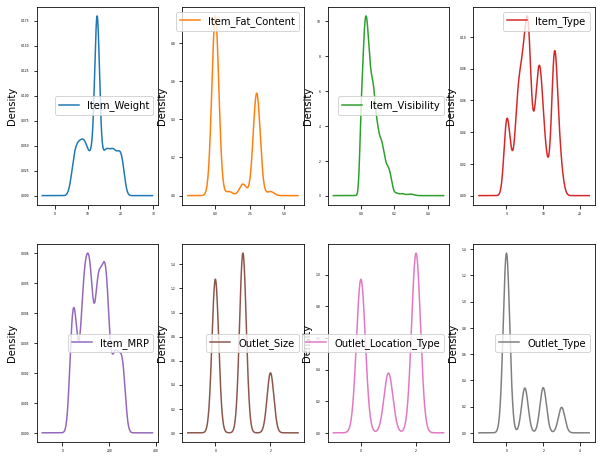

In [35]:
X.plot(kind='kde',subplots=True,layout=(2,4),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [38]:
#There is a slight skewness observed in item weight, item fat content and item visibility

In [37]:
X.skew().sort_values(ascending=False) #checking the skewness

Item_Visibility         1.157526
Outlet_Type             1.086107
Item_Fat_Content        0.498916
Outlet_Size             0.362313
Item_MRP                0.125353
Item_Type               0.103728
Item_Weight             0.084838
Outlet_Location_Type   -0.131948
dtype: float64

In [39]:
from sklearn.preprocessing import power_transform

In [40]:
New_X=power_transform(X)

In [41]:
pd.DataFrame(New_X).skew().sort_values(ascending=False) # transforming the data to reduce skewness

7    0.516629
1    0.411772
2    0.121951
5   -0.025036
0   -0.057467
4   -0.115095
3   -0.163906
6   -0.184860
dtype: float64

In [42]:
X=pd.DataFrame(New_X,columns=X.columns)
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.870768,-0.820409,-1.134852,-0.710835,1.622234,0.489133,-1.179443,-0.791970
1,-1.793674,1.249786,-1.023236,1.505576,-1.600871,0.489133,0.999191,0.935469
2,1.117375,-0.820409,-1.109929,0.686071,0.076445,0.489133,-1.179443,-0.791970
3,-0.967858,-0.820409,-1.744118,0.470200,-1.481986,1.529693,0.999191,-0.791970
4,-0.588093,1.249786,-1.744118,-1.925054,-1.533821,0.489133,0.999191,0.935469
...,...,...,...,...,...,...,...,...
6108,1.842989,1.398553,0.616890,-0.457004,0.638757,-1.169104,-1.179443,-0.791970
6109,-1.526674,-0.820409,0.049704,1.306453,1.145606,1.529693,0.999191,-0.791970
6110,-0.535898,-0.820409,-0.521358,0.248854,-0.873760,-1.169104,0.025561,-0.791970
6111,-1.431113,1.249786,1.502221,1.306453,-0.554586,0.489133,0.999191,0.935469


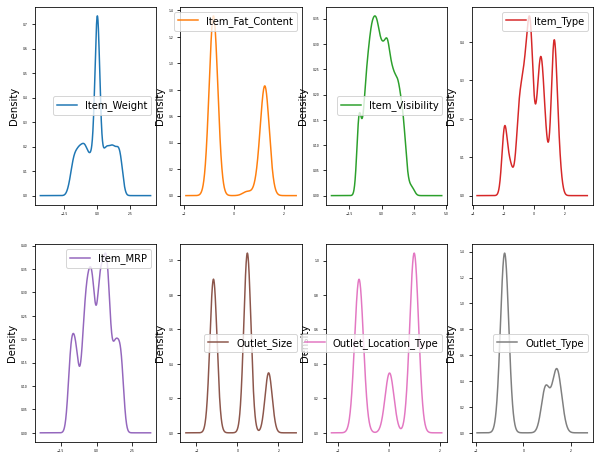

In [43]:
pd.DataFrame(X).plot(kind='kde',subplots=True,layout=(2,4),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() #Checking the skewness

In [63]:
X.isnull().sum() #Checking if there is any null values after transformation

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [53]:
X.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.030633,-0.007615,0.035148,0.029136,0.009508,0.005917,0.014192
Item_Fat_Content,-0.030633,1.000000,0.047604,-0.144743,0.007865,0.000675,0.002976,0.004257
Item_Visibility,-0.007615,0.047604,1.000000,-0.031246,0.001014,-0.079363,-0.079752,0.085717
Item_Type,0.035148,-0.144743,-0.031246,1.000000,0.042411,0.003609,0.004238,-0.001243
Item_MRP,0.029136,0.007865,0.001014,0.042411,1.000000,-0.007352,0.000423,-0.010575
Outlet_Size,0.009508,0.000675,-0.079363,0.003609,-0.007352,1.000000,0.618542,0.054327
Outlet_Location_Type,0.005917,0.002976,-0.079752,0.004238,0.000423,0.618542,1.000000,0.353758
Outlet_Type,0.014192,0.004257,0.085717,-0.001243,-0.010575,0.054327,0.353758,1.000000


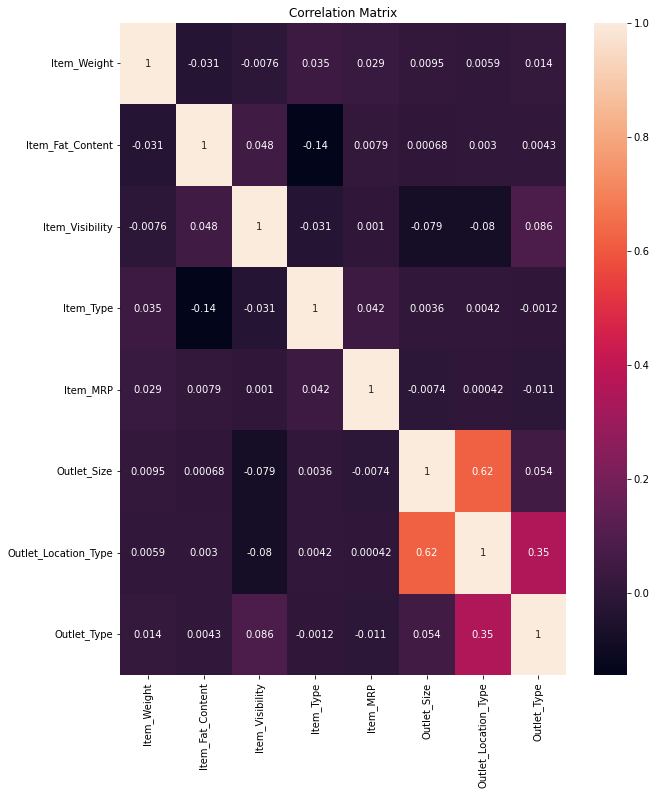

In [54]:
corr_mat=X.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [55]:
#It shows none of the data here is co-related

In [56]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data #Trying via the VIF technique to see any multicollinearity

,feature,VIF
0,Item_Weight,1.003075
1,Item_Fat_Content,1.024292
2,Item_Visibility,1.024796
3,Item_Type,1.024915
4,Item_MRP,1.003109
5,Outlet_Size,1.705782
6,Outlet_Location_Type,1.957362
7,Outlet_Type,1.220498


In [57]:
# It can be concluded that there is no multi colinearity in features

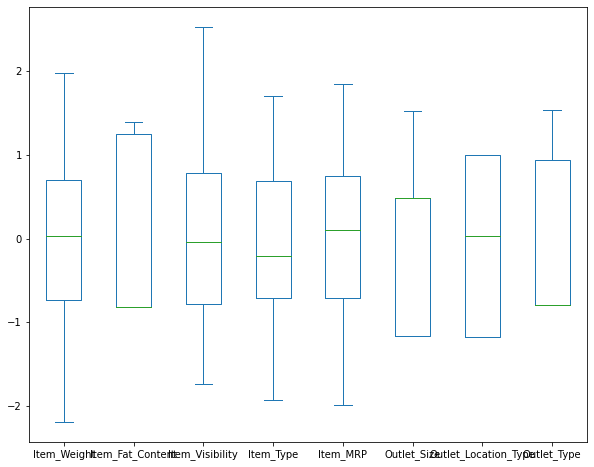

In [58]:
X.plot(kind='box',figsize=(10,8),layout=(3,3))
plt.show() #checking for oultiers

In [59]:
#Graph shows there is no Outliers present, therefore need to check via zscore

In [60]:
from scipy.stats import zscore # zcore to calculate the outliers

In [61]:
(np.abs(zscore(X)>3)).all()

Item_Weight             False
Item_Fat_Content        False
Item_Visibility         False
Item_Type               False
Item_MRP                False
Outlet_Size             False
Outlet_Location_Type    False
Outlet_Type             False
dtype: bool

In [62]:
#Therefore there is no outliers in the data

In [64]:
Scalar=StandardScaler() #scaling the data

In [65]:
X_Scaled=Scalar.fit_transform(X)
X_Scaled

array([[-0.87076847, -0.82040906, -1.13485243, ...,  0.4891327 ,
        -1.17944315, -0.79196968],
       [-1.7936741 ,  1.24978552, -1.02323569, ...,  0.4891327 ,
         0.99919084,  0.93546887],
       [ 1.11737475, -0.82040906, -1.10992887, ...,  0.4891327 ,
        -1.17944315, -0.79196968],
       ...,
       [-0.53589771, -0.82040906, -0.52135777, ..., -1.16910434,
         0.02556112, -0.79196968],
       [-1.43111337,  1.24978552,  1.5022215 , ...,  0.4891327 ,
         0.99919084,  0.93546887],
       [ 0.49145201, -0.82040906, -0.25073938, ..., -1.16910434,
        -1.17944315, -0.79196968]])

# Linear Regression

In [67]:
LR=LinearRegression()

In [68]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    LR.fit(X_train,y_train)
    pred_test=LR.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 42.35450186764097
/n
At random state 1 the testing accurancy is:- 38.363208200760226
/n
At random state 2 the testing accurancy is:- 40.92710655175974
/n
At random state 3 the testing accurancy is:- 38.330183772000325
/n
At random state 4 the testing accurancy is:- 37.128927652135935
/n
At random state 5 the testing accurancy is:- 41.576331288329314
/n
At random state 6 the testing accurancy is:- 38.64862326561028
/n
At random state 7 the testing accurancy is:- 37.86832248570873
/n
At random state 8 the testing accurancy is:- 43.4612295538099
/n
At random state 9 the testing accurancy is:- 41.349025060558176
/n
At random state 10 the testing accurancy is:- 43.23370899145371
/n
At random state 11 the testing accurancy is:- 40.46894900254158
/n
At random state 12 the testing accurancy is:- 39.06286070346419
/n
At random state 13 the testing accurancy is:- 45.6823305503676
/n
At random state 14 the testing accurancy is:- 40.23642202146177
/n
At

# Random Forest Regressor

In [69]:
RF=RandomForestRegressor()

In [70]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    RF.fit(X_train,y_train)
    pred_test=RF.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 55.44425865966123
/n
At random state 1 the testing accurancy is:- 53.401986378529706
/n
At random state 2 the testing accurancy is:- 52.54623461280317
/n
At random state 3 the testing accurancy is:- 54.6540750799517
/n
At random state 4 the testing accurancy is:- 51.696393012820565
/n
At random state 5 the testing accurancy is:- 56.527158848061475
/n
At random state 6 the testing accurancy is:- 53.90388559575663
/n
At random state 7 the testing accurancy is:- 51.25333213273178
/n
At random state 8 the testing accurancy is:- 52.49844260868039
/n
At random state 9 the testing accurancy is:- 54.189185492731795
/n
At random state 10 the testing accurancy is:- 60.40162245479609
/n
At random state 11 the testing accurancy is:- 51.81924058001426
/n
At random state 12 the testing accurancy is:- 52.46085617136522
/n
At random state 13 the testing accurancy is:- 56.59488004924012
/n
At random state 14 the testing accurancy is:- 54.04708414269448
/n
At

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=10)
RF.fit(X_train,y_train)
pred_test=RF.predict(X_test)

In [79]:
RF_Score=r2_score(y_test,pred_test)*100
RF_Score

61.08471505692219

# Gradient Boosting

In [71]:
GB=GradientBoostingRegressor()

In [72]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    GB.fit(X_train,y_train)
    pred_test=GB.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 60.7631415950598
/n
At random state 1 the testing accurancy is:- 59.071532579565456
/n
At random state 2 the testing accurancy is:- 59.104777586321745
/n
At random state 3 the testing accurancy is:- 57.24200017814008
/n
At random state 4 the testing accurancy is:- 57.0173665268076
/n
At random state 5 the testing accurancy is:- 60.92064341332228
/n
At random state 6 the testing accurancy is:- 58.71766818571827
/n
At random state 7 the testing accurancy is:- 58.2173195720388
/n
At random state 8 the testing accurancy is:- 59.65678037437605
/n
At random state 9 the testing accurancy is:- 58.53711192617621
/n
At random state 10 the testing accurancy is:- 65.15619912415238
/n
At random state 11 the testing accurancy is:- 58.2941373273631
/n
At random state 12 the testing accurancy is:- 57.62539073606594
/n
At random state 13 the testing accurancy is:- 61.38070702925684
/n
At random state 14 the testing accurancy is:- 59.22361666477425
/n
At rand

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=10)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)

In [77]:
GB_Score=r2_score(y_test,pred_test)*100
GB_Score

65.14480991737194

# Decision Tree Regressor

In [74]:
DT=DecisionTreeRegressor()

In [75]:
for i in range (0,100):
    X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=i)
    DT.fit(X_train,y_train)
    pred_test=DT.predict(X_test)
    print('At random state',i,'the testing accurancy is:-',r2_score(y_test,pred_test)*100)
    print("/n")

At random state 0 the testing accurancy is:- 15.982763480770668
/n
At random state 1 the testing accurancy is:- 17.483626162071385
/n
At random state 2 the testing accurancy is:- 9.681558050511164
/n
At random state 3 the testing accurancy is:- 18.916029515729914
/n
At random state 4 the testing accurancy is:- 17.23382332681388
/n
At random state 5 the testing accurancy is:- 17.083841999677084
/n
At random state 6 the testing accurancy is:- 22.825432216407926
/n
At random state 7 the testing accurancy is:- 8.977728532345663
/n
At random state 8 the testing accurancy is:- 7.145555589259278
/n
At random state 9 the testing accurancy is:- 10.613341322063752
/n
At random state 10 the testing accurancy is:- 18.67713438614098
/n
At random state 11 the testing accurancy is:- 12.656228497474642
/n
At random state 12 the testing accurancy is:- 8.566692129333198
/n
At random state 13 the testing accurancy is:- 19.03440785334738
/n
At random state 14 the testing accurancy is:- 12.618900757643736


### From the above models it is observed that Random Forest Regressor and Gradient Boosting Regressor gives the highest score, hence progressing with these two models 

# Cross Validation with RF

In [80]:
for i in range(2,10):
    RF_Val=cross_val_score(RF,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is 53.30538997934538
The cross validation score for 3 is 54.295811787708935
The cross validation score for 4 is 53.16713412075656
The cross validation score for 5 is 53.57758938044223
The cross validation score for 6 is 54.185712526604966
The cross validation score for 7 is 53.50461471833853
The cross validation score for 8 is 53.63480043740465
The cross validation score for 9 is 53.555178772291924


# Cross Validation with GB

In [81]:
for i in range(2,10):
    GB_Val=cross_val_score(GB,X,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is 57.81083332434458
The cross validation score for 3 is 58.60944645974149
The cross validation score for 4 is 58.204506602394346
The cross validation score for 5 is 58.04965285047704
The cross validation score for 6 is 58.40666468434422
The cross validation score for 7 is 58.28382948934788
The cross validation score for 8 is 58.2630808222327
The cross validation score for 9 is 58.256097685995236


### Going with Gradient Boosting as it has a cross validation score better than Random Forest Regressor